In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import re
import csv
import pickle
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

2022-10-19 13:58:13.331479: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-19 13:58:13.334253: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/snekha/miniconda3/envs/ml38/lib/python3.8/site-packages/cv2/../../lib64:
2022-10-19 13:58:13.334262: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
w, h = 128, 128
numCategory = 156
filIm = open('/home/snekha/datasets/tamil_data/image_ALL_128x128.obj', 'rb')
images = pickle.load(filIm)
filLab = open('/home/snekha/datasets/tamil_data/label_ALL_128x128.obj', 'rb')
labels = pickle.load(filLab)
images

[array([[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],
 
        ...,
 
        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]]], dtype=uint8),
 array([[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],
 
        ...,
 
        [[1],
         [1],
         [1],
      

In [4]:
def plotIm(img_):
  plt.imshow(img_, cmap='gray')
  plt.show()

In [5]:
tamilCharacterCode = []
w,h=128,128
with open('/home/snekha/datasets/tamil_data/unicodeTamil.csv', newline='') as f:
  reader = csv.reader(f)
  data = list(reader)
  for i in data:
    go = i[1].split(' ')
    charL = ""
    for gg in go:
      charL = charL + "\\u"+str(gg)
    tamilCharacterCode.append(charL.encode('utf-8').decode('unicode-escape'))
print(tamilCharacterCode)


['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஃ', 'க', 'ங', 'ச', 'ஞ', 'ட', 'ண', 'த', 'ந', 'ப', 'ம', 'ய', 'ர', 'ல', 'வ', 'ழ', 'ள', 'ற', 'ன', 'ஸ', 'ஷ', 'ஜ', 'ஹ', 'க்ஷ', 'கி', 'ஙி', 'சி', 'ஞி', 'டி', 'ணி', 'தி', 'நி', 'பி', 'மி', 'யி', 'ரி', 'லி', 'வி', 'ழி', 'ளி', 'றி', 'னி', 'ஸி', 'ஷி', 'ஜி', 'ஹி', 'க்ஷி', 'கீ', 'ஙீ', 'சீ', 'ஞீ', 'டீ', 'ணீ', 'தீ', 'நீ', 'பீ', 'மீ', 'யீ', 'ரீ', 'லீ', 'வீ', 'ழீ', 'ளீ', 'றீ', 'னீ', 'ஸீ', 'ஷீ', 'ஜீ', 'ஹீ', 'க்ஷீ', 'கு', 'ஙு', 'சு', 'ஞு', 'டு', 'ணு', 'து', 'நு', 'பு', 'மு', 'யு', 'ரு', 'லு', 'வு', 'ழு', 'ளு', 'று', 'னு', 'கூ', 'ஙூ', 'சூ', 'ஞூ', 'டூ', 'ணூ', 'தூ', 'நூ', 'பூ', 'மூ', 'யூ', 'ரூ', 'லூ', 'வூ', 'ழூ', 'ளூ', 'றூ', 'னூ', 'ா', 'ெ', 'ே', 'ை', 'ஸ்ரீ', 'ஸு', 'ஷு', 'ஜு', 'ஹு', 'க்ஷு', 'ஸூ', 'ஷூ', 'ஜ0BC2', 'ஹூ', 'க்ஷூ', 'க்', 'ங்', 'ச்', 'ஞ்', 'ட்', 'ண்', 'த்', 'ந்', 'ப்', 'ம்', 'ய்', 'ர்', 'ல்', 'வ்', 'ழ்', 'ள்', 'ற்', 'ன்', 'ஸ்', 'ஷ்', 'ஜ்', 'ஹ்', 'க்ஷ்', 'ஔ']


In [6]:
images=np.array(images)
labels=np.array(labels,dtype=np.uint8)
y_labels=to_categorical(labels)
X_train, X_test, y_train, y_test = train_test_split(images, y_labels, test_size=0.33, random_state=42)
keras.initializers.lecun_uniform(seed=None)
print(X_train.shape, y_train.shape)

(55549, 128, 128, 1) (55549, 156)


உ


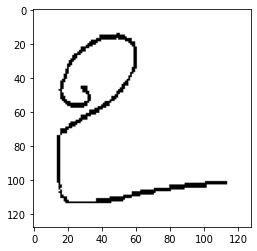

In [7]:
ridx = np.random.randint(X_train.shape[0])
print(tamilCharacterCode[np.argmax(y_train[ridx])])
plotIm(X_train[ridx].reshape(w,h))

In [8]:
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(w,h,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(numCategory, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        2

2022-10-19 13:58:17.012330: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/snekha/miniconda3/envs/ml38/lib/python3.8/site-packages/cv2/../../lib64:
2022-10-19 13:58:17.012352: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-19 13:58:17.012365: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (snekha): /proc/driver/nvidia/version does not exist
2022-10-19 13:58:17.012591: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.

In [9]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100, verbose=1)
TrainAccuracy = model.evaluate(X_train, y_train, verbose=1)
TestAccuracy = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/20
556/556 [==============================] - 320s 574ms/step - loss: 2.5491 - accuracy: 0.3972 - val_loss: 0.8554 - val_accuracy: 0.7431
Epoch 2/20
556/556 [==============================] - 318s 572ms/step - loss: 0.7868 - accuracy: 0.7573 - val_loss: 0.5304 - val_accuracy: 0.8339
Epoch 3/20
556/556 [==============================] - 316s 568ms/step - loss: 0.5595 - accuracy: 0.8219 - val_loss: 0.4205 - val_accuracy: 0.8677
Epoch 4/20
556/556 [==============================] - 315s 567ms/step - loss: 0.4515 - accuracy: 0.8533 - val_loss: 0.3707 - val_accuracy: 0.8807
Epoch 5/20
556/556 [==============================] - 319s 574ms/step - loss: 0.3865 - accuracy: 0.8750 - val_loss: 0.3443 - val_accuracy: 0.8912
Epoch 6/20
556/556 [==============================] - 318s 572ms/step - loss: 0.3381 - accuracy: 0.8857 - val_loss: 0.3134 - val_accuracy: 0.9014
Epoch 7/20
556/556 [==============================] - 314s 566ms/step - loss: 0.3114 - accuracy: 0.8954 - val_loss: 0.2986 -

In [10]:
# model.save("/home/snekha/datasets/tamil_data/tamilALLEzhuthukalKeras_Model.h5")
# print("Saved model to disk")

In [ ]:
import neptune.new as neptune

run = neptune.init(
    project="snekhasuresh2777/cnn-tamil",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJlN2UzMzBkYS0wZjE2LTRjMGItYTY4Ny0wNTZlODRiNmQ0YWIifQ==",
)  # your credentials

model = neptune.init_model(
    name="Prediction model",
    key="MOD", 
    project="snekhasuresh2777/cnn-tamil", 
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJlN2UzMzBkYS0wZjE2LTRjMGItYTY4Ny0wNTZlODRiNmQ0YWIifQ==", # your credentials
)
params = {"learning_rate": 0.001, "optimizer": "Adam"}
run["parameters"] = params

for epoch in range(10):
    run["train/loss"].log(0.9 ** epoch)

run["eval/f1_score"] = 0.97


# params = {"C":200, "class_weight":'balanced', "coef0":0.34, "degree":3.0, "gamma":0.3,
#     "kernel":'poly', "random_state":67, "tol":0.8}
# run["parameters"] = params



# # You can upload image from the disc
# run["val/conf_matrix"].upload("confusion_matrix.png")

# You can also upload plot objects directly
# run["val/roc_curve"].upload(plt_fig_roc)
# run["train/tables"].track_files("/home/snekha/datasets/Cleaned_data")
# run = neptune.init(source_files=["final_svm-Copy4.py"])